# Machine Learning:

## About the Data:

Zomato is an Indian multinational restaurant aggregator and food delivery 
company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato 
provides information, menus, and user reviews of restaurants as well as food 
delivery options from partner restaurants in select cities.

# Section A: Title: Regression model

## Steps that are to be followed:

## Step 1: Understand the business problem.

## Problem:

Restaurants from all over the world can be found here in Bengaluru. From the United States 
to Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, 
Bars, Drinks, Buffet, Desserts you name it and Bengaluru has it. Bengaluru is the best place 
for foodies. The number of restaurants is increasing day by day. Currently, it stands at 
approximately 12,000 restaurants. With such a high number of restaurants. This industry 
hasn't been saturated yet. And new restaurants are opening every day. However, it has 
become difficult for them to compete with already established restaurants. The key issues 
that continue to pose a challenge to them include high real estate costs, rising food costs, 
shortage of quality manpower, fragmented supply chain, and over-licensing. 


## Objective:
The newly started companies are not able to decide the cost that would happen per 
two people for once. So the Zomato company has a good analyst team who can predict the 
cost per two customers for one time so that the newly started restaurants and upcoming 
restaurants will be well prepared how the restaurant should invest in improving the 
ambiance and all other stuff to attract the customers. Assume you are the analyst team that 
Zomato has organized to help new and upcoming restaurants by letting them know the 
various reasons that customers look for and build a model which able to predict the cost for 
two people.

## Step 2: Read the data, and convert the data types.
Note: The data set has numerical and categorical data but due to noise(anomaly) in 
the data, the columns are treated as the object type. And You may feel like converting the 
features into numerical at this step if not appropriate at this stage, In that case, feel free to 
convert the variable to the appropriate type in the further step as well based on your way 
of analyzing the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[12,7]

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## cleaning the columns

In [5]:
# Cleaning and Converting the rate column
df.rate=list(map(lambda x:str(x).replace('/','').strip('5'),df.rate))
df.rate=list(map(lambda x:str(x).replace('-','NAN').replace('NEW','NAN'),df.rate))
df.rate=df.rate.astype('float')

In [6]:
# Cleaning and Converting the approx_cost(for two people) column
df['approx_cost(for two people)']=list(map(lambda x:str(x).replace(',',''),df['approx_cost(for two people)']))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float')

In [7]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [8]:
# creating a area column for imputing missing values

In [9]:
df['Area']=list(map(lambda x : x.strip('Bangalore').strip(" ',").split(',')[-1],df['address']))

In [10]:
# Droping the unnecessary columns
df1=df.drop(['url','address','phone'],axis=1)
df1=df1.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'type','listed_in(city)':'city'})

In [11]:
df1.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
approx_cost     float64
reviews_list     object
menu_item        object
type             object
city             object
Area             object
dtype: object

## Step 3: Perform the described method for the data, Try to find any essential points from the described analysis. And check the missing values and Duplicate records. Impute the missing values in the best way possible.
#### Note: To impute the missing values with parameters, You must find the best parameter.
#### Hints:
● Check the distribution using plots. And check the Skewness, Kurtosis and etc. 

In [12]:
# Describing the Numerial data
df1.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.679772,283.697527,555.431566
std,0.455416,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.300000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


* The average approx_cost is 555.43
* The maximun cost for two people is 6000

In [13]:
# Describing the Categorical data
df1.describe(include='object').T

,count,unique,top,freq
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182
cuisines,51672,2723,North Indian,2913
reviews_list,51717,22513,[],7595
menu_item,51717,9098,[],39617
type,51717,7,Delivery,25942


* We can see that there are missing values in the dataset
* There are many unique values in few columns

In [14]:
# Duplicate records
df1[df1.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area
596,My Tea House,Yes,Yes,NaN,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500.0,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari,Banashankari
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],[],Delivery,Bellandur,Bellandur
7599,Nawab Di Biryani,Yes,No,NaN,0,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400.0,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield,Whitefield
9464,Vyanjan,Yes,No,3.9,201,BTM,Quick Bites,"Poha, Jalebi, Paratha, Bhindi Masala, Kachori,...","North Indian, Street Food",300.0,"[('Rated 3.0', ""RATED\n Nice place, it's for ...","['Jeera Rice', 'Khichdi', 'Plain Tawa Roti', '...",Delivery,BTM,BTM
9466,Carrots,Yes,Yes,4.1,600,Koramangala 6th Block,Casual Dining,"Pizza, Pasta, Salads, Masala Chai, Soya Butter...","Italian, North Indian, Healthy Food, Desserts",1100.0,"[('Rated 5.0', ""RATED\n It's the first vegan ...",[],Delivery,BTM,Koramangala 6th Block
9467,Eatsomnia,Yes,No,NaN,0,JP Nagar,Delivery,NaN,"North Indian, South Indian, Chinese, Continental",500.0,"[('Rated 1.0', ""RATED\n The worst food I ate ...",[],Delivery,BTM,JP Nagar
9468,Rolls & Co,Yes,No,3.9,213,Koramangala 6th Block,Quick Bites,"Rolls, Chicken Wings, Shawarma, Chicken Tikka ...","Burger, Beverages, Rolls",400.0,"[('Rated 2.0', 'RATED\n Order : Peri Peri Fri...",[],Delivery,BTM,Koramangala 6th Block
9469,Fogg,No,Yes,NaN,0,BTM,Quick Bites,NaN,"Fast Food, Chinese",200.0,"[('Rated 5.0', 'RATED\n Seafood soup - A Thai...",[],Delivery,BTM,BTM
9470,The Paratha Stories,Yes,No,3.3,36,Koramangala 1st Block,Delivery,NaN,North Indian,400.0,"[('Rated 3.0', 'RATED\n There is enough scope...",[],Delivery,BTM,Koramangala 1st Block
9471,Mycakeshop,Yes,No,NaN,0,BTM,Bakery,NaN,"Bakery, Desserts",300.0,"[('Rated 5.0', 'RATED\n I loved cake nice tru...","['Red Velvet Cake', 'Truffle Chocolate Cake', ...",Delivery,BTM,BTM


In [15]:
# droping the duplicated values
df1=df1.drop_duplicates()

## Missing values

In [16]:
# checking the missing values 
count=df1.isnull().sum()
percentage=(df1.isnull().sum()/len(df))*100
null=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
null[null['count']!=0]

,count,percentage
rate,10032,19.397877
location,21,0.040606
rest_type,227,0.438927
dish_liked,28039,54.216215
cuisines,45,0.087012
approx_cost,345,0.667092


The skewness of the  rate is  -0.3502889099403157
The kurtosis of the  rate is  -0.16226468719927167
The skewness of the  approx_cost is  2.602098748865473
The kurtosis of the  approx_cost is  10.45107909806164


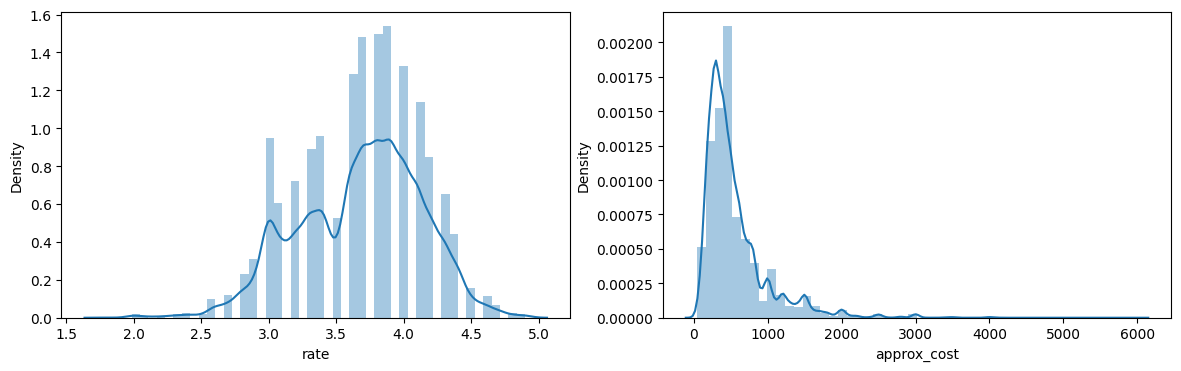

In [17]:
# checking the skewness and kurtosis
cols=['rate','approx_cost']
it=1
for i in cols:
    plt.subplot(2,2,it)
    sns.distplot(df1[i])
    print('The skewness of the ',i,'is ',df1[i].skew())
    print('The kurtosis of the ',i,'is ',df1[i].kurt())
    it+=1
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='rate', ylabel='approx_cost'>

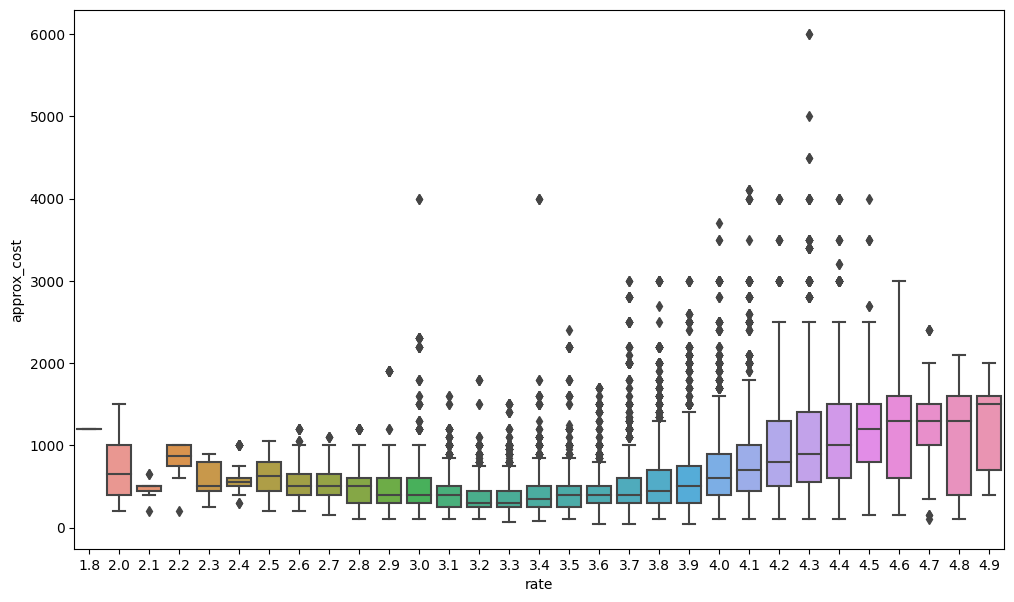

In [19]:
sns.boxplot(x = df1.rate,y = df1.approx_cost)

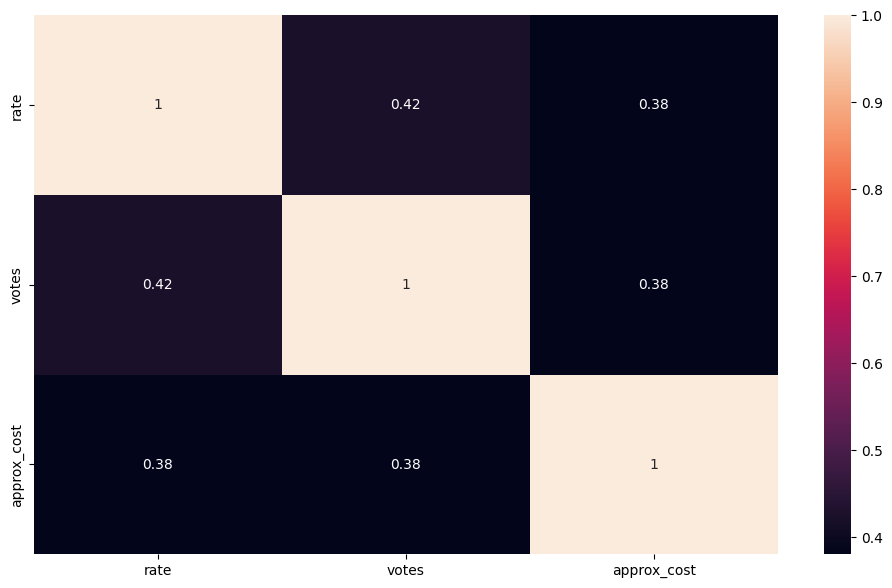

In [20]:
# checking the correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Rate column

In [21]:
# Extracting rate from review_list column and replacing in that
l=list(map(lambda x : x.split(' ')[1:2],df1.reviews_list))
rate=[]
for i in l:
    for j in i:
        a=j.split("'")[0]           
        rate.append(a)

In [22]:
df1.loc[(df1.reviews_list!='[]'),'reviews_list']=rate
df1.reviews_list.unique()

array(['4.0', '3.0', '5.0', '1.0', '2.0', '1.5', '[]', '3.5', '4.5',
       '2.5'], dtype=object)

In [23]:
df1[df1.rate.isnull()].head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150.0,4.0,[],Delivery,Banashankari,Banashankari
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,Bengaluru


In [24]:
# Imputing the values
df1.loc[(df1.reviews_list=='[]')&(df1.rate.isnull()),'rate']=3.7
df1.loc[(df1.reviews_list!='[]')&(df1.rate.isnull()),'rate']=df1.reviews_list

In [25]:
df1.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8,
       4.4, 4.3, '4.0', 2.9, '1.0', 2.6, 3.4, '5.0', 2.0, '3.0', 2.7,
       '3.5', 4.7, '2.0', 2.4, 2.2, '4.5', 2.3, 4.8, 3.5, 2.5, 4.5, 4.9,
       '1.5', 2.1, '2.5', 1.8], dtype=object)

### location

In [26]:
# imputing
df1.loc[(df1.location.isnull()),'location']=df1.loc[(df1.location.isnull()),'Area']

### rest_type

In [27]:
# droping the records of where there are null values in rest_type column
# as the same records have null values in dish_liked
df1=df1.dropna(subset='rest_type',axis=0)

### cuisines 

In [28]:
# droping the records of where there are null values in cuisines column
# as the same records have null values in dish_liked
df1=df1.dropna(subset='cuisines',axis=0)

In [29]:
df1.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27858
cuisines            0
approx_cost       317
reviews_list        0
menu_item           0
type                0
city                0
Area                0
dtype: int64

### dish_liked

In [30]:
df1.dish_liked.unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [31]:
# pd.set_option('display.max_rows',None)
# dish=[]
# for i in df1.dish_liked.dropna():
#         d=i.split(',')
#         for j in d:
# #         print(d)
#             dish.append(j)
# pd.DataFrame(dish).value_counts()

In [32]:
# creating a column with 1 st popular dish
df1['dishes']=df1.dish_liked.str.split(',',expand=True)[0]
df1.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area,dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari,Pasta
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari,Momos


In [33]:
# create dict
dishs=df1.dish_liked.str.split(',',expand=True)[0].value_counts().to_dict()
dishs

{'Burgers': 1258,
 'Cocktails': 910,
 'Coffee': 804,
 'Pizza': 766,
 'Biryani': 764,
 'Pasta': 663,
 'Noodles': 518,
 'Rolls': 440,
 'Paratha': 427,
 'Beer': 408,
 'Waffles': 386,
 'Sandwiches': 380,
 'Sea Food': 370,
 'Salads': 331,
 'Chicken Biryani': 307,
 'Chaat': 293,
 'Lassi': 281,
 'Masala Dosa': 273,
 'Momos': 270,
 'Mutton Biryani': 259,
 'Tandoori Chicken': 259,
 'Mocktails': 242,
 'Thali': 226,
 'Tea': 217,
 'Fish': 211,
 'Chicken Grill': 189,
 'Filter Coffee': 174,
 'Butter Chicken': 169,
 'Shawarma': 160,
 'Nachos': 154,
 'Appam': 148,
 'Hyderabadi Biryani': 139,
 'Roti': 122,
 'Cup Cake': 120,
 'Dal Makhani': 119,
 'Gulab Jamun': 118,
 'Vada': 112,
 'Sushi': 107,
 'Brownie': 106,
 'Neer Dosa': 104,
 'Hot Chocolate': 103,
 'Donut': 99,
 'Chicken Curry': 99,
 'Raita': 96,
 'Sandwich': 93,
 'Pav Bhaji': 92,
 'Salad': 91,
 'Ginger Tea': 90,
 'Fries': 88,
 'Breakfast Buffet': 88,
 'Poha': 85,
 'Garlic Bread': 85,
 'Pancakes': 83,
 'Paneer Tikka': 81,
 'Murgh Ghee Roast': 77,
 

In [34]:
# making a list
popular=[]
unpopular=[]
for i,j in dishs.items():
    if j>100:
        popular.append(i)
    else:
        unpopular.append(i)
print(popular)
print(unpopular)

['Burgers', 'Cocktails', 'Coffee', 'Pizza', 'Biryani', 'Pasta', 'Noodles', 'Rolls', 'Paratha', 'Beer', 'Waffles', 'Sandwiches', 'Sea Food', 'Salads', 'Chicken Biryani', 'Chaat', 'Lassi', 'Masala Dosa', 'Momos', 'Mutton Biryani', 'Tandoori Chicken', 'Mocktails', 'Thali', 'Tea', 'Fish', 'Chicken Grill', 'Filter Coffee', 'Butter Chicken', 'Shawarma', 'Nachos', 'Appam', 'Hyderabadi Biryani', 'Roti', 'Cup Cake', 'Dal Makhani', 'Gulab Jamun', 'Vada', 'Sushi', 'Brownie', 'Neer Dosa', 'Hot Chocolate']
['Donut', 'Chicken Curry', 'Raita', 'Sandwich', 'Pav Bhaji', 'Salad', 'Ginger Tea', 'Fries', 'Breakfast Buffet', 'Poha', 'Garlic Bread', 'Pancakes', 'Paneer Tikka', 'Murgh Ghee Roast', 'Manchow Soup', 'Panneer Butter Masala', 'Faluda', 'Naan', 'English Breakfast', 'Friendly Staff', 'Peri Peri Chicken', 'Vegetable Biryani', 'Ghee Rice', 'Chai', 'Cheesecake', 'Dum Biryani', 'Chicken Boneless Biryani', 'Chole Bhature', 'Fish Curry', 'Butter Naan', 'Hot Chocolate Fudge', 'Spring Roll', 'Buttermilk', 

In [35]:
def dish(x):
    if x in popular:
        return('Popular')
    elif x in unpopular:
        return('Unpopular')
    else:
        return(np.nan)
df1.dish_liked=df1.dishes.apply(dish)

In [36]:
df1.dish_liked.unique()

array(['Popular', 'Unpopular', nan], dtype=object)

In [37]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area,dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Popular,"North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari,Pasta
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Popular,"Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari,Momos
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Unpopular,"Cafe, Mexican, Italian",800.0,3.0,[],Buffet,Banashankari,Banashankari,Churros
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Popular,"South Indian, North Indian",300.0,4.0,[],Buffet,Banashankari,Banashankari,Masala Dosa
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Unpopular,"North Indian, Rajasthani",600.0,4.0,[],Buffet,Banashankari,Basavanagudi,Panipuri


In [38]:
# nan=df1.groupby(['name','dish_liked']).describe().reset_index()[['name','dish_liked']].to_dict()
# for i,j in nan.items():
#     df1.loc[(df1.dish_liked.isnull())&(df1.name==i),'dish_liked']=j

In [39]:
df1.groupby(['name','dish_liked']).describe()['votes']

count         mean  \
name                                         dish_liked                       
#L-81 Cafe                                   Popular       9.0    48.000000   
#refuel                                      Unpopular     3.0    37.000000   
1000 B.C                                     Popular       6.0    49.000000   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         Popular       3.0    41.000000   
1131 Bar + Kitchen                           Popular       6.0  2823.000000   
...                                                        ...          ...   
eat.fit                                      Popular      22.0   407.454545   
                                             Unpopular    22.0   970.636364   
i-Bar - The Park Bangalore                   Unpopular    11.0   619.727273   
nu.tree                                      Unpopular     7.0   206.142857   
re:cess - Hilton Bangalore Embassy GolfLinks Popular       3.0   146.000000   

                                                                std     min  \
name                                         dish_liked                       
#L-81 Cafe                                   Popular       0.000000    48.0   
#refuel                                      Unpopular     0.000000    37.0   
1000 B.C                                     Popular       0.000000    49.0   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         Popular       0.000000    41.0   
1131 Bar + Kitchen                           Popular      41.626914  2785.0   
...                                                             ...     ...   
eat.fit                                      Popular     356.463012    94.0   
                                             Unpopular   316.271665   230.0   
i-Bar - The Park Bangalore                   Unpopular     3.258555   617.0   
nu.tree                                      Unpopular    87.304884    52.0   
re:cess - Hilton Bangalore Embassy GolfLinks Popular       0.000000   146.0   

                                                             25%     50%  \
name                                         dish_liked                    
#L-81 Cafe                                   Popular       48.00    48.0   
#refuel                                      Unpopular     37.00    37.0   
1000 B.C                                     Popular       49.00    49.0   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         Popular       41.00    41.0   
1131 Bar + Kitchen                           Popular     2785.00  2823.0   
...                                                          ...     ...   
eat.fit                                      Popular      118.75   156.5   
                                             Unpopular    746.00  1119.5   
i-Bar - The Park Bangalore                   Unpopular    617.00   617.0   
nu.tree                                      Unpopular    174.00   185.0   
re:cess - Hilton Bangalore Embassy GolfLinks Popular      146.00   146.0   

                                                            75%     max  
name                                         dish_liked                  
#L-81 Cafe                                   Popular       48.0    48.0  
#refuel                                      Unpopular     37.0    37.0  
1000 B.C                                     Popular       49.0    49.0  
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         Popular       41.0    41.0  
1131 Bar + Kitchen                           Popular     2861.0  2861.0  
...                                                         ...     ...  
eat.fit                                      Popular      854.0   882.0  
                                             Unpopular   1186.5  1238.0  
i-Bar - The Park Bangalore                   Unpopular    623.0   625.0  
nu.tree                                      Unpopular    279.0   300.0  
re:cess - Hilton Bangalore Embassy GolfLinks Popular      146.0   146.0  

[3497 rows x 8 columns]

In [40]:
df1.groupby(['name','dish_liked']).describe().reset_index()[['name','dish_liked']]

,name,dish_liked
,,
0,#L-81 Cafe,Popular
1,#refuel,Unpopular
2,1000 B.C,Popular
3,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Popular
4,1131 Bar + Kitchen,Popular
...,...,...
3492,eat.fit,Popular
3493,eat.fit,Unpopular
3494,i-Bar - The Park Bangalore,Unpopular


### approx_cost

In [41]:
df1.name.value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Crescent Moon Bakery                                        1
Foodizclub                                                  1
Three Side Square                                           1
Grub Bucket                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8755, dtype: int64

In [43]:
# Grouping by name and approx cost and imputing their cost to null values
dict1=df1.groupby("name")["approx_cost"].median().to_dict()
for i,j in dict1.items():
    df1.loc[(df1.name==i)&(df1.approx_cost.isnull()),'approx_cost']=j

In [44]:
df1.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27858
cuisines            0
approx_cost       138
reviews_list        0
menu_item           0
type                0
city                0
Area                0
dishes          27858
dtype: int64

In [47]:
# Grouping by location and cuisines and imputing their cost to null values
dict2=df1.groupby(['location','cuisines'])['approx_cost'].median().to_dict()
for i,j in dict2.items():
    df1.loc[(df1.approx_cost.isnull())&(df1.location==i[0])&(df1.cuisines==i[1]),'approx_cost']=j

In [48]:
df1.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27858
cuisines            0
approx_cost        71
reviews_list        0
menu_item           0
type                0
city                0
Area                0
dishes          27858
dtype: int64

In [49]:
# Grouping by location and cuisines and imputing their cost to null values
dict3=df1.groupby('cuisines')['approx_cost'].median().to_dict()
for i,j in dict3.items():
    df1.loc[(df1.approx_cost.isnull())&(df1.cuisines==i),'approx_cost']=j

In [50]:
df1.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27858
cuisines            0
approx_cost        31
reviews_list        0
menu_item           0
type                0
city                0
Area                0
dishes          27858
dtype: int64

In [51]:
df1.dropna(subset='approx_cost',inplace=True)

In [52]:
df1.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      27840
cuisines            0
approx_cost         0
reviews_list        0
menu_item           0
type                0
city                0
Area                0
dishes          27840
dtype: int64

In [53]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area,dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Popular,"North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari,Pasta
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Popular,"Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari,Momos
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Unpopular,"Cafe, Mexican, Italian",800.0,3.0,[],Buffet,Banashankari,Banashankari,Churros
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Popular,"South Indian, North Indian",300.0,4.0,[],Buffet,Banashankari,Banashankari,Masala Dosa
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Unpopular,"North Indian, Rajasthani",600.0,4.0,[],Buffet,Banashankari,Basavanagudi,Panipuri


## Step 4: Once the basic preprocessing is done like converting the data types, missing value imputation, and duplicate rows. perform the EDA(Exploratory Data Analysis) on the data to  find the various factors that will help to understand the cost per two persons. 

## Bivariate analysis

In [54]:
num_cols=df1.select_dtypes(include=np.number)
cat_cols=df1.select_dtypes(exclude=np.number)


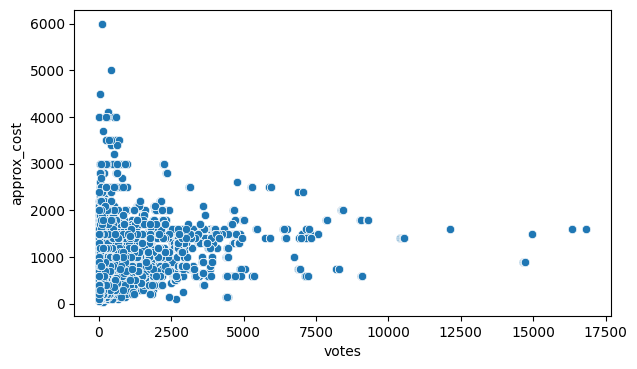

In [56]:
# Numerical columns
it=1
for i in num_cols.drop('approx_cost',axis=1):
    plt.subplot(2,2,it)
    sns.scatterplot(x = df1[i],y = df1.approx_cost)
    it+=1
plt.tight_layout()
plt.show()

In [57]:
# There are not much correlation of these variables with target
# when approx cost is lower the votes are also lower

In [58]:
df1.votes.unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [59]:
cat_cols.columns

Index(['name', 'online_order', 'book_table', 'rate', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'reviews_list', 'menu_item', 'type', 'city',
       'Area', 'dishes'],
      dtype='object')

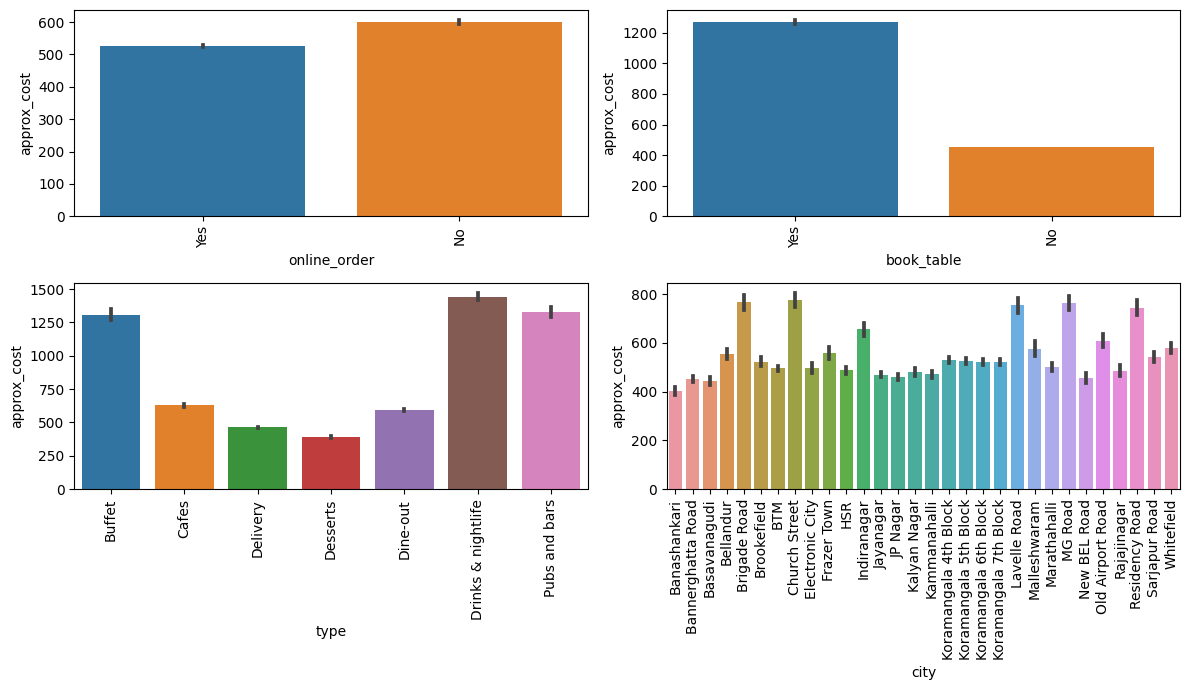

In [61]:
# categorical
cols=['online_order', 'book_table','type', 'city']
it=1
plt.figure(figsize=(12,7))
for i in cols:
    plt.subplot(2,2,it)
    sns.barplot(x=df1[i],y=df1.approx_cost)
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

* The approx cost for no online order is high
* Those booked table their approx cost is high
* Drinks & nightlife type has the higher cost
* 5 cities have higher cost than others

In [62]:
# we can convert type variable into 2 categoriees

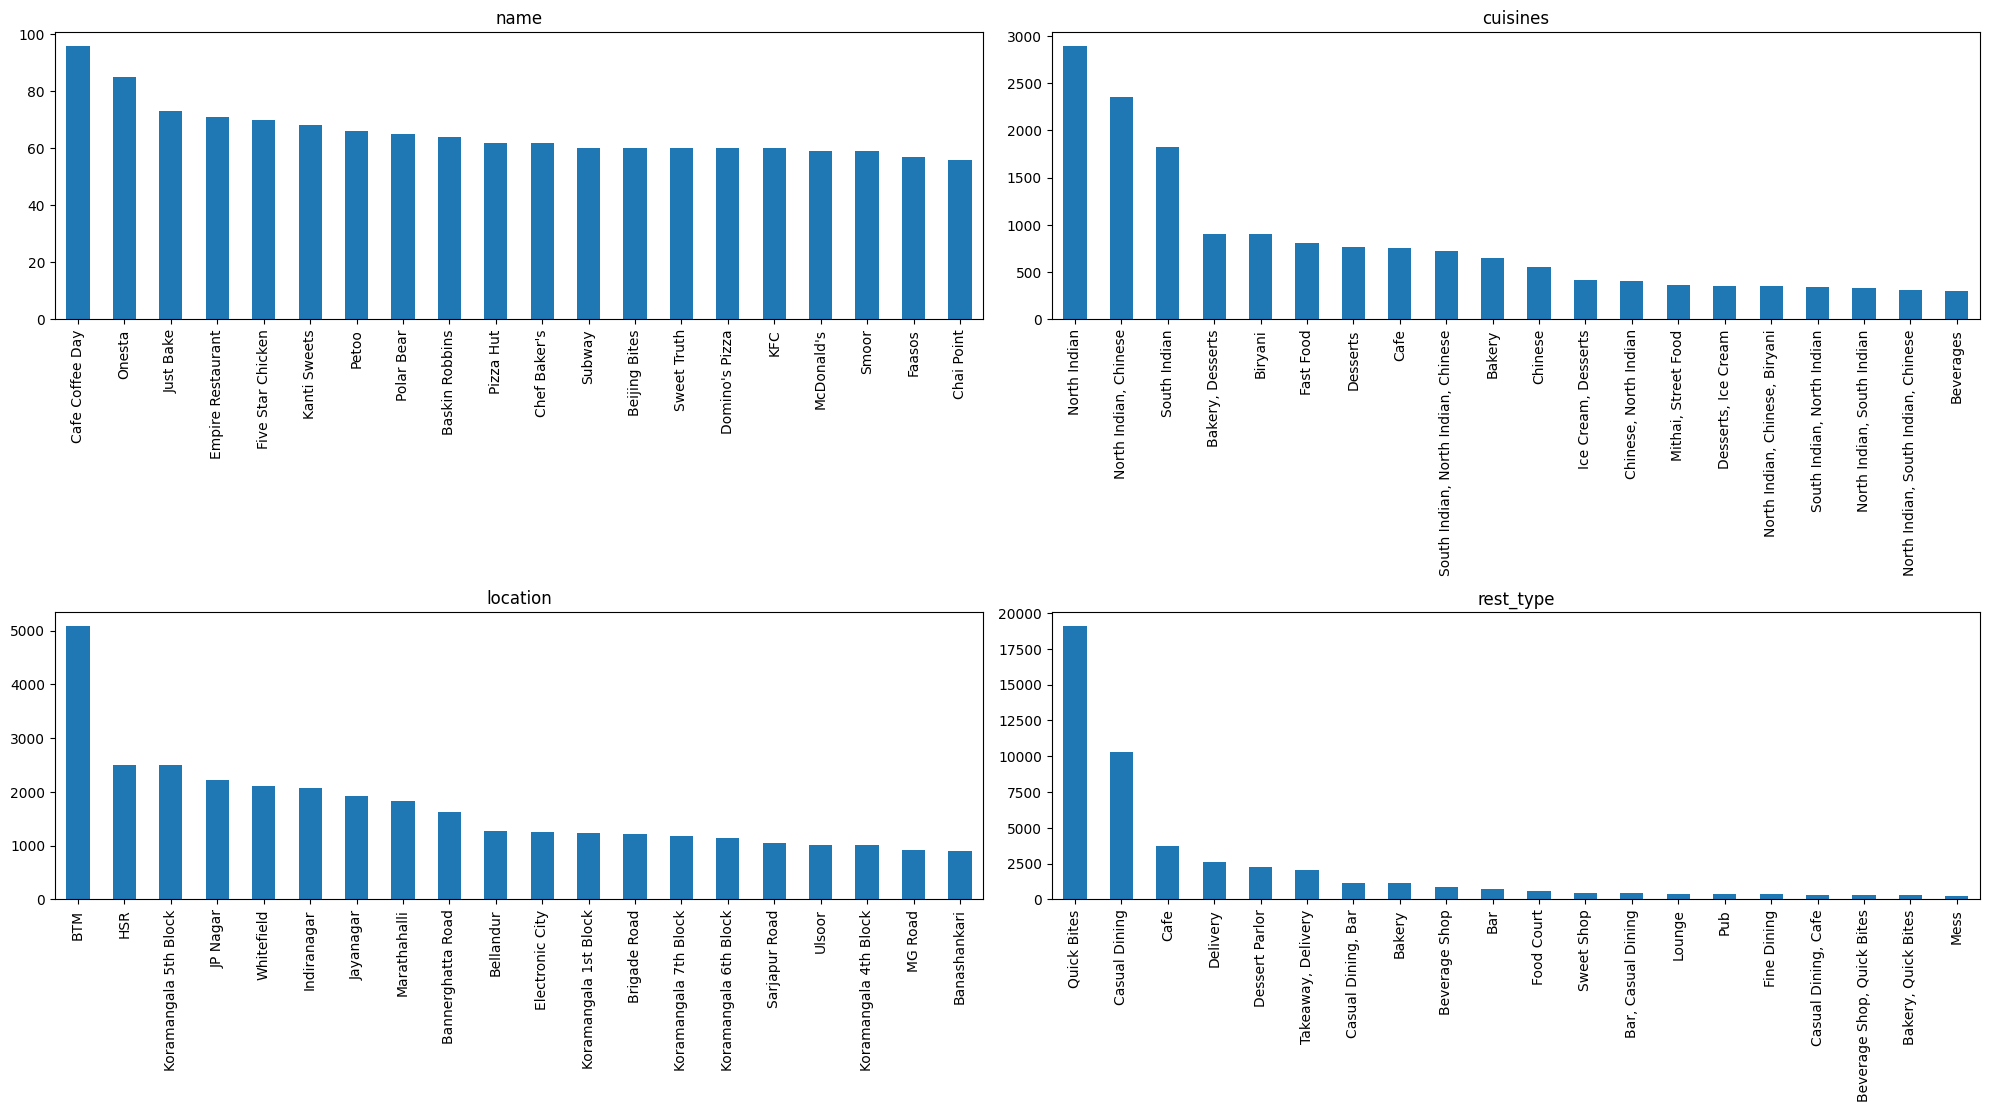

In [63]:
# univariate on other numerical columns
cols=['name', 'cuisines','location', 'rest_type'] 
it=1
plt.figure(figsize=(20,15))
for i in cols:
    plt.subplot(3,2,it)
    df1[i].value_counts()[:20].sort_values(ascending=False).plot(kind='bar')
#     sns.countplot(df1[i][:20])
    plt.xticks(rotation=90)
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* cafe coffee day name is most frequently occured
* North indian cuisines are more in number
* BTM is famous location
* The most frequent restuarant type is Quick bites 

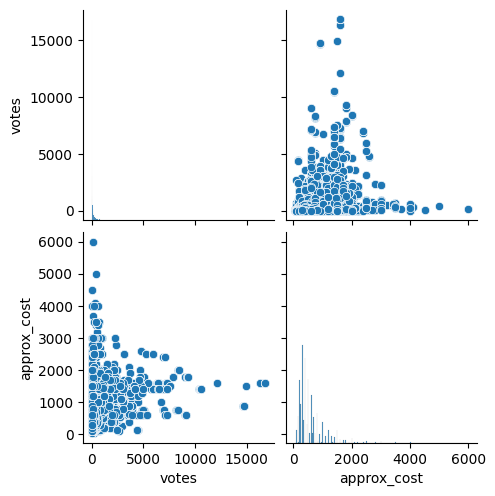

In [64]:
# Multivariate anlaysis
sns.pairplot(df1)
plt.show()

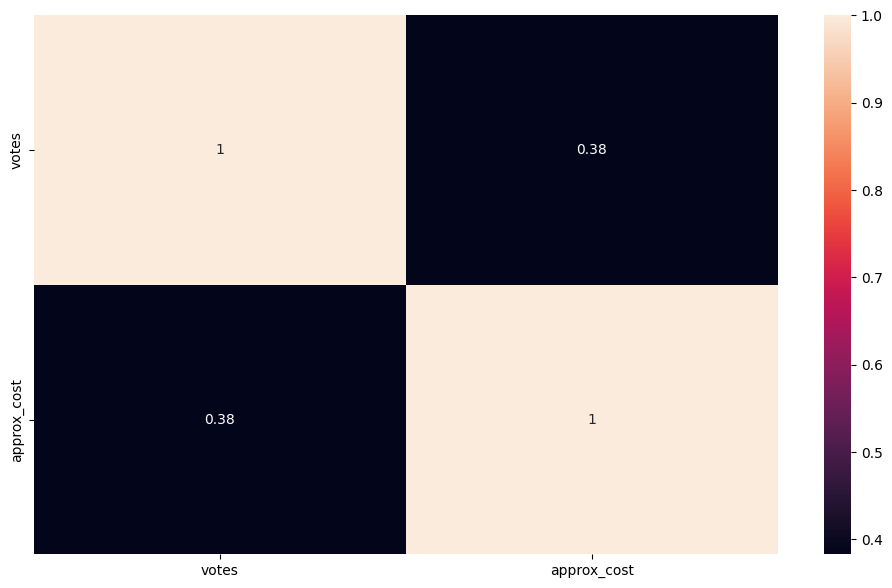

In [66]:
# checking the correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [67]:
# The correlation among the variable is very less

## Step 5: Make a copy of the data set and Perform the preprocessing that require for the model.
Note: You can see many categorical variables with a high number of unique values. 
Therefore do not keep dropping the variables as the first option, try to create new variables 
or perform any other feature engineering methods.

In [68]:
# Making a copy of dataset
f_df=df1.copy()

In [69]:
f_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area,dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Popular,"North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari,Pasta
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Popular,"Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari,Momos
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Unpopular,"Cafe, Mexican, Italian",800.0,3.0,[],Buffet,Banashankari,Banashankari,Churros
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Popular,"South Indian, North Indian",300.0,4.0,[],Buffet,Banashankari,Banashankari,Masala Dosa
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Unpopular,"North Indian, Rajasthani",600.0,4.0,[],Buffet,Banashankari,Basavanagudi,Panipuri


In [70]:
df1.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [71]:
df1.rest_type.str.split(',',expand = True)[0].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'Dhaba',
       'Club', 'Bhojanalya', 'Pop Up'], dtype=object)

In [72]:
bar=['Beverage Shop','Club','Bar','Pub']
dining=['Casual Dining','Quick Bites','Food Truck','Fine Dining','Dhaba','Cafe','Bhojanalya','Mess','Food Court']
others=['Lounge','Club', 'Pop Up','Kiosk','Bakery','Sweet Shop','Confectionery','Dessert Parlor']
delivery=['Delivery','Takeaway']
print(len(others))
print(len(dining))
print(len(bar))
print(len(delivery))

8
9
4
2


In [73]:
def types(x):
    if x in bar:
        return('bar')
    elif x in dining:
        return('Dining')
    elif x in delivery:
        return('delivery')
    else:
        return('Others')
f_df.rest_type.apply(types).value_counts()

Dining      34492
Others      12227
delivery     2711
bar          1954
Name: rest_type, dtype: int64

In [74]:
f_df.rest_type

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51384, dtype: object

In [75]:
f_df.cuisines.str.split(',',expand = True)

,0,1,2,3,4,5,6,7
0,North Indian,Mughlai,Chinese,None,None,None,None,None
1,Chinese,North Indian,Thai,None,None,None,None,None
2,Cafe,Mexican,Italian,None,None,None,None,None
3,South Indian,North Indian,None,None,None,None,None,None
4,North Indian,Rajasthani,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
51712,Continental,None,None,None,None,None,None,None
51713,Finger Food,None,None,None,None,None,None,None
51714,Finger Food,None,None,None,None,None,None,None
51715,Finger Food,None,None,None,None,None,None,None


In [76]:
##  cusines
f_df.cuisines.str.split(',',expand = True)[0].unique()

array(['North Indian', 'Chinese', 'Cafe', 'South Indian', 'Pizza',
       'Italian', 'Bakery', 'Biryani', 'Street Food', 'Burger',
       'Fast Food', 'Ice Cream', 'Healthy Food', 'Asian', 'Desserts',
       'Goan', 'Continental', 'Seafood', 'Beverages', 'Mithai',
       'Sandwich', 'Mangalorean', 'Rolls', 'Andhra', 'Thai', 'Salad',
       'Bengali', 'Arabian', 'BBQ', 'Vietnamese', 'Juices', 'Mexican',
       'Tibetan', 'Tea', 'Momos', 'Mughlai', 'Hyderabadi', 'Finger Food',
       'Kebab', 'American', 'Kerala', 'Oriya', 'Maharashtrian', 'Bohri',
       'African', 'Rajasthani', 'Turkish', 'Tamil', 'Roast Chicken',
       'Gujarati', 'South American', 'Konkan', 'Drinks Only', 'Awadhi',
       'European', 'Lebanese', 'Japanese', 'Modern Indian', 'Bihari',
       'Australian', 'Mediterranean', 'Chettinad', 'Steak', 'Spanish',
       'Portuguese', 'Parsi', 'Nepalese', 'Burmese', 'North Eastern',
       'Lucknowi', 'Korean', 'Malaysian', 'Sushi', 'Kashmiri', 'French',
       'Assamese', 'Co

In [77]:
f_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,type,city,Area,dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Popular,"North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari,Pasta
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Popular,"Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari,Momos
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Unpopular,"Cafe, Mexican, Italian",800.0,3.0,[],Buffet,Banashankari,Banashankari,Churros
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Popular,"South Indian, North Indian",300.0,4.0,[],Buffet,Banashankari,Banashankari,Masala Dosa
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Unpopular,"North Indian, Rajasthani",600.0,4.0,[],Buffet,Banashankari,Basavanagudi,Panipuri


<AxesSubplot: xlabel='reviews_list', ylabel='approx_cost'>

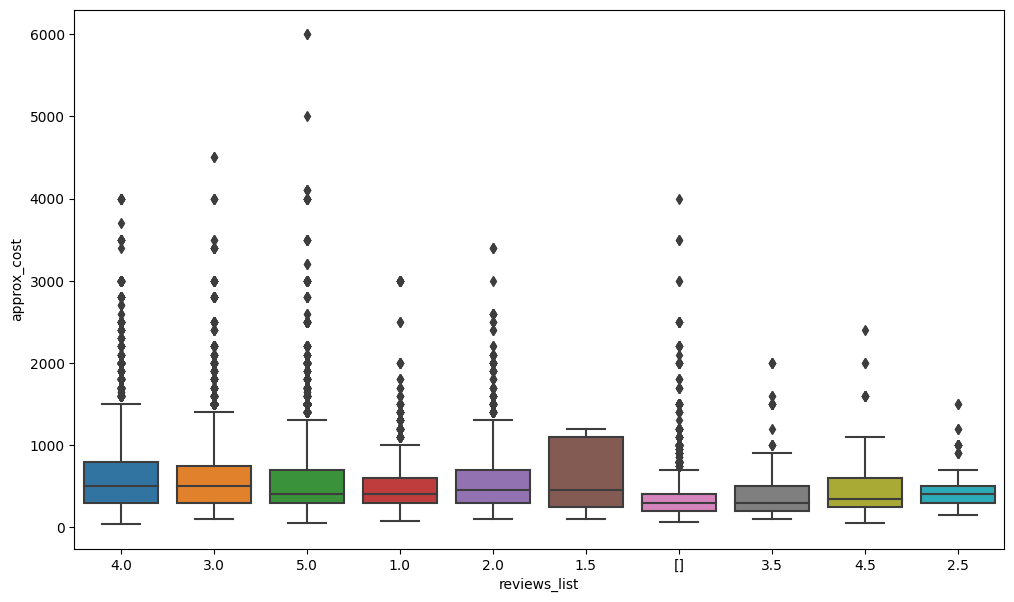

In [81]:
sns.boxplot(x = f_df.reviews_list,y = f_df.approx_cost)

In [ ]:
f_df.drop(['dish_liked','dishes'],axis=1,inplace=True)

In [84]:
f_df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
menu_item       0
type            0
city            0
Area            0
dtype: int64

In [85]:
f_df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,menu_item,type,city,Area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,4.0,[],Buffet,Banashankari,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,4.0,[],Buffet,Banashankari,Banashankari


In [86]:
dummydata=f_df.drop(['name','location','rest_type','cuisines','menu_item','Area'],axis=1)

# Encoding

In [87]:
mean=dummydata.groupby('city')['approx_cost'].mean()
dummydata['city']=dummydata['city'].map(mean)

In [88]:
f_df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'menu_item',
       'type', 'city', 'Area'],
      dtype='object')

In [89]:
dummydata['reviews_list'].mode()

0    4.0
Name: reviews_list, dtype: object

In [90]:
dummydata['reviews_list']=dummydata['reviews_list'].replace('[]','4.0')

In [91]:
# converting the dtypes
dummydata[['rate','votes','reviews_list']]=dummydata[['rate','votes','reviews_list']].astype(float)

In [92]:
dummydata=pd.get_dummies(dummydata,drop_first=True)

In [93]:
dummydata.head(2)

,rate,votes,approx_cost,reviews_list,city,online_order_Yes,book_table_Yes,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,4.1,775.0,800.0,4.0,402.37369,1,1,0,0,0,0,0,0
1,4.1,787.0,800.0,4.0,402.37369,1,0,0,0,0,0,0,0


## Step 6: Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables.


In [94]:
num_cols=dummydata.select_dtypes(include=np.number)
cat_cols=dummydata.select_dtypes(exclude=np.number)

In [95]:
# hypothesis testing between stroke feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.
significant_features=[]
for i in num_cols:
    if i !='approx_cost':
        pvalue=stats.ttest_ind(dummydata[i],dummydata.approx_cost)[1]
        if pvalue<0.05:
            print(i,pvalue)
            significant_features.append(i)
        else:
            print(i,pvalue)
print('The significant Features are ',significant_features)

rate 0.0
votes 0.0
reviews_list 0.0
city 0.9999999999999545
online_order_Yes 0.0
book_table_Yes 0.0
type_Cafes 0.0
type_Delivery 0.0
type_Desserts 0.0
type_Dine-out 0.0
type_Drinks & nightlife 0.0
type_Pubs and bars 0.0
The significant Features are  ['rate', 'votes', 'reviews_list', 'online_order_Yes', 'book_table_Yes', 'type_Cafes', 'type_Delivery', 'type_Desserts', 'type_Dine-out', 'type_Drinks & nightlife', 'type_Pubs and bars']


## Step 7: Split the dataset into train and test data sets and Perform the scaling on both sets if necessary

In [96]:
from sklearn.model_selection import train_test_split
x=dummydata.drop('approx_cost',axis=1)
y=dummydata.approx_cost
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## Step 8: Build the base model.

In [97]:
import statsmodels.api as sma
temp_tr=sma.add_constant(xtrain)
temp_te=sma.add_constant(xtest)

model=sma.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            approx_cost   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                          1.384e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:16:52   Log-Likelihood:                     -2.9474e+05
No. Observations:               41107   AIC:                                  5.895e+05
Df Residuals:                   41095   BIC:                                  5.896e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
rate                       83.5458      2.843     29.387      0.000      77.974      89.118
votes                       0.0609      0.002     28.215      0.000       0.057       0.065
reviews_list              -11.2578      1.421     -7.923      0.000     -14.043      -8.473
city                        0.7258      0.013     53.893      0.000       0.699       0.752
online_order_Yes          -18.8260      3.339     -5.639      0.000     -25.370     -12.282
book_table_Yes            600.4919      5.502    109.138      0.000     589.708     611.276
type_Cafes               -181.5013     12.615    -14.388      0.000    -206.226    -156.776
type_Delivery            -236.8517      9.302    -25.462      0.000    -255.084    -218.619
type_Desserts            -308.7461     10.929    -28.249      0.000    -330.168    -287.324
type_Dine-out            -175.5968      9.335    -18.811      0.000    -193.893    -157.300
type_Drinks & nightlife   264.9426     14.090     18.804      0.000     237.326     292.559
type_Pubs and bars        194.5637     16.467     11.815      0.000     162.288     226.839
==============================================================================
Omnibus:                    23229.789   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           384130.452
Skew:                           2.379   Prob(JB):                         0.00
Kurtosis:                      17.200   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 9: Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like a parametric and nonparametric models. Once you choose the final model, rebuild the model with best  parameters. 
Note: If you are performing with Linear models, check the model is fulfilling the 
assumptions.

## Ridge

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params=({'alpha':[0.001,0.01,0.1,1,0.5,2,3,4,5]})
grid=GridSearchCV(estimator=ridge,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'alpha': 1}

In [99]:
from sklearn.metrics import mean_squared_error
ridge=Ridge(alpha=1)
ridge_model=ridge.fit(xtrain,ytrain)
pred_train=ridge_model.predict(xtrain)
pred_test=ridge_model.predict(xtest)

# RMSE
print('The rmse for train ',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('The rmse for test ',np.sqrt(mean_squared_error(ytest,pred_test)))

The rmse for train  312.9623240988293
The rmse for test  323.3257715867733


## Logistic regression

In [100]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
ypred_lr_train=lr_model.predict(xtrain)
ypred_lr_test=lr_model.predict(xtest)
yprob_lr=lr_model.predict_proba(xtest)[:,1]
print('The rmse for train ',np.sqrt(mean_squared_error(ytrain,ypred_lr_train)))
print('The rmse for test ',np.sqrt(mean_squared_error(ytest,ypred_lr_test)))

The rmse for train  432.3924805160258
The rmse for test  447.4081376622411


## DecisionTreeClassifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt_model=dt.fit(xtrain,ytrain)
yred_dt_train=dt_model.predict(xtrain)
yred_dt_test=dt_model.predict(xtest)
yprob_dt=dt_model.predict_proba(xtest)[:,1]
print('The rmse for train ',np.sqrt(mean_squared_error(ytrain,yred_dt_train)))
print('The rmse for test ',np.sqrt(mean_squared_error(ytest,yred_dt_test)))

The rmse for train  96.72548700336255
The rmse for test  227.29237253723053
